# Study Introduction

Allen Chang
29 March 2024
Comparing Machine Learning Models for Diabetes Prediction

**Abstract**
	In this study, I aim to identify the best model for diabetes prediction. Here, I will be comparing a simple logistic regression, a neural network, and a decision tree classifier. The features I will consider are age, hypertension, heart disease, body mass index, HbA1c level, and blood glucose level. 


**Introduction**
Diabetes is a disease that is characterized by a constant state of hyperglycemia resulting in issues related to both insulin secretion and action (Kharroubi and Darwish). In fact, 0.5% of US adults are diagnosed with type 1 diabetes while 8.5% of US adults are diagnosed with type 2 diabetes (Xu et. al.). In fact, globally, about 45.8% of diabetes cases are estimated to be undiagnosed (J. Beagley et. al.). Thus, there is a need for an accurate and efficient method to diagnose diabetes. 

**Methodology**
Here, I will create three different models: logistic regression, neural network, and decision tree classifier. Using the publicly available dataset, I will train the three models and compare their results through various performance measures including accuracy, F1 score, precision, and recall. The dataset is available at: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/discussion

**Expected Results** I expect the models to perform better than a baseline random guess model, meaning that the AUROC score should be greater than 0.5. A well-performing model can be further improved upon for future clinical applications. Furthermore, this will aid doctors in diagnosing diabetes as well as helping individuals who may not have easily accessible healthcare advice. 
	Potential limitations may include a lack of features and a relatively small sample size. Furthermore, there may be better model architectures or hyperparameters that can be used to improve the model. 

**References**
References
Kharroubi AT, Darwish HM. Diabetes mellitus: The epidemic of the century. World J Diabetes. 2015 Jun 25;6(6):850-67.
Xu G, Liu B, Sun Y, Du Y, Snetselaar LG, Hu FB, Bao W. Prevalence of diagnosed type 1 and type 2 diabetes among US adults in 2016 and 2017: population based study.
J. Beagley, L. Guariguata, C. Weil, and A. A. Motala, “Global estimates of undiagnosed diabetes in adults,” Diabetes Res. Clin. Pract., vol. 103, no. 2, pp. 150–160, Feb. 2014, doi: 10.1016/j.diabres.2013.11.001.

In [439]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc, RocCurveDisplay
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Dropout
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from keras.optimizers import SGD, Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Data Analysis
**Note** Individuals without diabetes are referred to as healthy

In [379]:
df = pd.read_csv('/Users/allenchang/Downloads/diabetes_prediction_dataset.csv')
dfdiabetes = df[df['diabetes'] == 1]
dfhealthy = df[df['diabetes'] == 0]

**Preliminary Analysis** Below shows a preliminary analysis of the dataset I am working with. As shown below, 8.5% of individuals in the dataset have diabetes whereas 91.5% of individuals are healthy. Due to a relative lack of individuals with diabetes, an imbalance is created which may present a challenge as the models may have trouble capturing the distinguishing features for positive tests.

In [318]:
print(f"The number of people with diabetes is {len(dfdiabetes)}")
print(f"The number of people without diabetes is {len(dfhealthy)}")
print()
print(f"The percentage of people with diabetes in the dataset is {len(dfdiabetes) / len(df) * 100}%")
print(f"The percentage of people without diabetes in the dataset is {len(dfhealthy) / len(df) * 100}%")

The number of people with diabetes is 8500
The number of people without diabetes is 91500

The percentage of people with diabetes in the dataset is 8.5%
The percentage of people without diabetes in the dataset is 91.5%


**In-depth Insights** Below shows some comparative measures between people with and without diabetes. As shown, there is a significant difference between the age, bmi, HbA1c_level, and blood glucose levels of people with and without diabetes. In fact, the p-value for those measures are nearly 0 when conducting a t-test. Furthermore, it can be observed that about 25% of individuals with diabetes have hypertension while only about 6% of healthy individuals have hypertension. Similarly, about 15% of individuals with diabetes have heart disease whereas only about 3% of healthy individuals have heart disease. 

In [195]:
print(f"The average age of people with diabetes is {dfdiabetes['age'].mean()}")
print(f"The average age of people without diabetes is {dfhealthy['age'].mean()}")
print()
print(f"The percentage of people with hypertension given they have diabetes is {(dfdiabetes['hypertension'] == 1).sum() / len(dfdiabetes) * 100}%")
print(f"The percentage of people with hypertension given they are healthy is {(dfhealthy['hypertension'] == 1).sum() / len(dfhealthy) * 100}%")
print()
print(f"The percentage of people with heart disease given they have diabetes is {(dfdiabetes['heart_disease'] == 1).sum() / len(dfdiabetes) * 100}%")
print(f"The percentage of people with heart disease given they are healthy is {(dfhealthy['heart_disease'] == 1).sum() / len(dfhealthy) * 100}%")
print()
print(f"The average BMI of people with diabetes is {dfdiabetes['bmi'].mean()}")
print(f"The average BMI of people without diabetes is {dfhealthy['bmi'].mean()}")
print()
print(f"The average HbA1c_level of people with diabetes is {dfdiabetes['HbA1c_level'].mean()}")
print(f"The average HbA1c_level of people without diabetes is {dfhealthy['HbA1c_level'].mean()}")
print()
print(f"The average blood glucose level of people with diabetes is {dfdiabetes['blood_glucose_level'].mean()}")
print(f"The average blood glucose level of people without diabetes is {dfhealthy['blood_glucose_level'].mean()}")

The average age of people with diabetes is 60.946588235294115
The average age of people without diabetes is 40.115186885245905

The percentage of people with hypertension given they have diabetes is 24.564705882352943%
The percentage of people with hypertension given they are healthy is 5.898360655737704%

The percentage of people with heart disease given they have diabetes is 14.905882352941177%
The percentage of people with heart disease given they are healthy is 2.9234972677595628%

The average BMI of people with diabetes is 31.988382352941176
The average BMI of people without diabetes is 26.88716349726776

The average HbA1c_level of people with diabetes is 6.93495294117647
The average HbA1c_level of people without diabetes is 5.3967606557377055

The average blood glucose level of people with diabetes is 194.09470588235294
The average blood glucose level of people without diabetes is 132.85246994535518


In [430]:
# Do paired t-tests for the statistics
t_statage, p_valage = ttest_ind(dfdiabetes['age'], dfhealthy['age'], equal_var=False)
print(f"The t-statistic is {t_statage} and the p-value is {p_valage} for the age of people with versus without diabetes")
print()

t_statbmi, p_valbmi = ttest_ind(dfdiabetes['bmi'], dfhealthy['bmi'], equal_var=False)
print(f"The t-statistic is {t_statbmi} and the p-value is {p_valbmi} for the bmi of people with versus without diabetes")
print()

t_statbgl, p_valbgl = ttest_ind(dfdiabetes['blood_glucose_level'], dfhealthy['blood_glucose_level'], equal_var=False)
print(f"The t-statistic is {t_statbgl} and the p-value is {p_valbgl} for the blood glucose level of people with versus without diabetes")
print()

t_statH, p_valH = ttest_ind(dfdiabetes['HbA1c_level'], dfhealthy['HbA1c_level'], equal_var=False)
print(f"The t-statistic is {t_statH} and the p-value is {p_valH} for the HbA1c level of people with versus without diabetes")



The t-statistic is 119.58735427299895 and the p-value is 0.0 for the age of people with versus without diabetes

The t-statistic is 60.26512781229193 and the p-value is 0.0 for the bmi of people with versus without diabetes

The t-statistic is 94.79487848528022 and the p-value is 0.0 for the blood glucose level of people with versus without diabetes

The t-statistic is 127.01105850980812 and the p-value is 0.0 for the HbA1c level of people with versus without diabetes


In [290]:
# Gender and smoker columns have too much missing data, and I wanted models to be gender agnostic
X = np.array(df[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']])
y = np.array(df[['diabetes']])
y = y.flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80/20 split

# Model Architectures and Plotting Functions

In [459]:
def Auroc(probs, y_test, preds = True): #Plots AUROC curve
    
    if preds is True:
        preds = probs[:,1]
    else:
        preds = probs
    
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    
    font = {'size': 10}
    plt.rc('font', **font)
    
    plt.title('Receiver Operating Characteristic for Diabetes Classification')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [358]:
def Logisticmodel(X_train, X_test, y_train, y_test): # Logistic Regression Model
    model = LogisticRegression(max_iter=1000, penalty="l1", C = 10.0, random_state=0, solver='liblinear') # L1 penalty on logistic regression
    model.fit(X_train, y_train)
    probs = model.predict_proba(X_test)
    return model, probs
    

In [447]:
def Lossplot(model, history): # Plots the training and validation losses
    # Plot train and test accuracy and loss
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(train_acc) + 1)

    plt.figure(figsize=(10, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
    plt.title('Accuracy vs. Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_loss, 'ro', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Loss vs. Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Output final accuracy
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Test accuracy: {test_accuracy:.4f}")

In [364]:
def Neuralnetwork(X_train, X_test, y_train, y_test): # Simple fully connected neural network
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(256, activation = 'relu'),
        Dense(128, activation = 'relu'),
#         Dropout(0.2),
        Dense(64, activation = 'relu'),
#         Dropout(0.2),
        Dense(1, activation = 'sigmoid')
    ])
    model.compile(loss='binary_crossentropy',
             optimizer=Adam(learning_rate=0.001),
             metrics=['accuracy'])
    model.summary()
    
    history = model.fit(X_train, y_train, epochs = 100, batch_size = 150, validation_data=(X_test, y_test), verbose=1)

    return model, history
    

In [449]:
def Decisiontree(X_train, X_test, y_train, y_test): # Simple decision tree clasifier
    dtree = DecisionTreeClassifier()
    dtree = dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    print(f"The accuracy of the decision tree is {accuracy_score(pred, y_test)}")
    
    return dtree, dtree.predict_proba(X_test)

# Logistic Regression Model

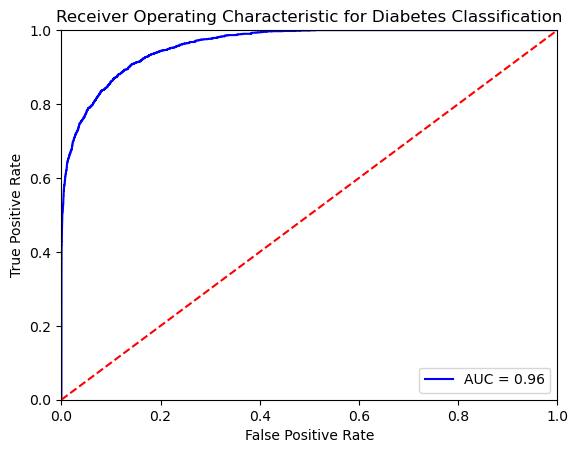

625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9608 - loss: 0.1004
The accuracy for logistic regression is 0.9610499739646912


In [359]:
logmodel,logprobs = Logisticmodel(X_train, X_test, y_train, y_test)
Auroc(logprobs, y_test)

logtest_loss, logtest_accuracy = model.evaluate(X_test, y_test)
print(f"The accuracy for logistic regression is {logtest_accuracy}")

# Neural Network Model

In [366]:
model, history = Neuralnetwork(X_train, X_test, y_train, y_test)

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 256)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,009 (168.00 KB)

 Trainable params: 43,009 (168.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
534/534 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9043 - loss: 0.3771 - val_accuracy: 0.9276 - val_loss: 0.2540
Epoch 2/100
534/534 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9254 - loss: 0.2463 - val_accuracy: 0.9301 - val_loss: 0.2137
Epoch 3/100
534/534 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9288 - loss: 0.2196 - val_accuracy: 0.9291 - val_loss: 0.2207
Epoch 4/100
534/534 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9359 - loss: 0.1862 - val_accuracy: 0.9440 - val_loss: 0.1547
Epoch 5/100
534/534 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9433 - loss: 0.1610 - val_accuracy: 0.9281 - val_loss: 0.2061
Epoch 6/100
534/534 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9497 - loss: 0.1418 - val_accuracy: 0.9409 - val_loss: 0.1614
Epoch 7/100
534/534 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9544 - loss: 0.1305 - val_accuracy: 0.9333 - val_loss: 0.1841
Epoch 8/100
534/534 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9559 - loss: 0

534/534 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9643 - loss: 0.1014 - val_accuracy: 0.9570 - val_loss: 0.1395
Epoch 100/100
534/534 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9651 - loss: 0.0985 - val_accuracy: 0.9656 - val_loss: 0.1076


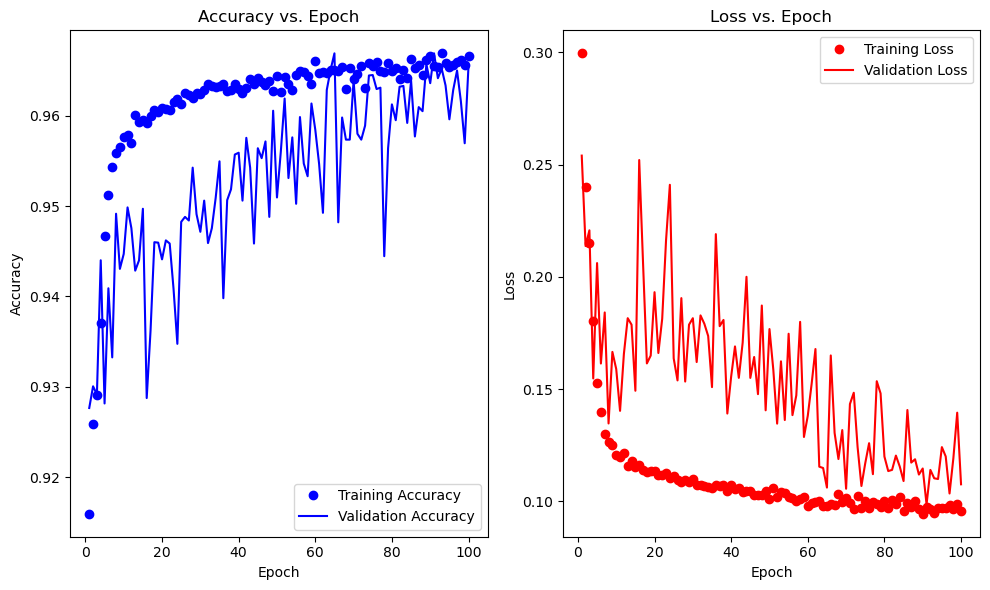

625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9652 - loss: 0.1074
Test accuracy: 0.9656


In [368]:
Lossplot(model, history)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


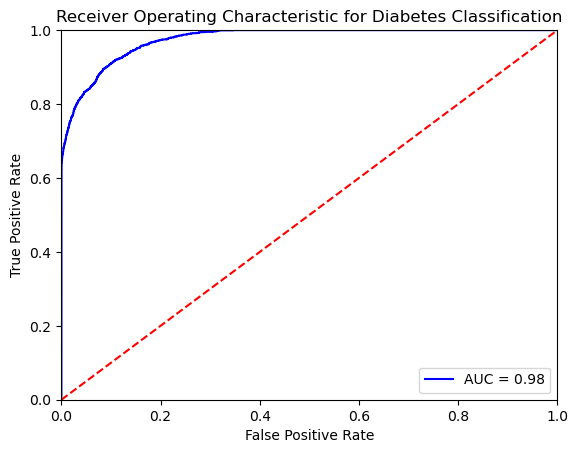

In [460]:
nnpred = model.predict(X_test)
Auroc(nnpred, y_test, False)

# Decision Tree

The accuracy of the decision tree is 0.95605


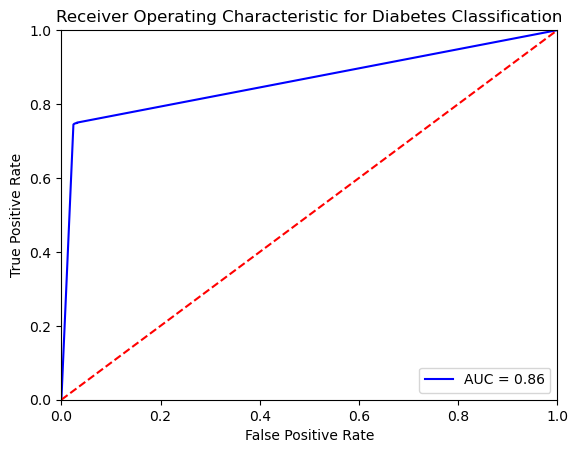

In [461]:
dtree, treeprob = Decisiontree(X_train, X_test, y_train, y_test)
Auroc(treeprob, y_test)

# Comparative Analysis between Models

**Model Analysis** As shown in the results below, the F1-score of the neural network is the highest, followed by the decision tree. The logistic regression model performs the worst between the three models in terms of this test statistic. The precision is the exact opposite, where the decision tree performs the best, the logistic regression performs the second best, and the logistic regression model performs the worst. The neural network has a perfect recall score while the logistic regression has the second best recall score, and the decision tree has the worst recall score. In terms of accuracy, the neural network performs the best, followed by the decision tree, and the logistic regression model performs the worst. Moreover, the neural network has the highest AUC value at 0.98 followed by the logistic regression model at 0.96 and the decision tree at 0.86.
In this specific application, recall is more important than precision. A false negative can be detrimental in terms of diabetes diagnosis. On the other hand, a false positive for diabetes can later be ruled out clinically upon further inspection. 

In [463]:
logpred = logmodel.predict(X_test)
nnpred = model.predict(X_test)
nnpred = np.round(nnpred).astype(int) # Rounds network predictions to nearest integer
treepred = dtree.predict(X_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [466]:
print(f"The f1-score for Logistic Regression is {f1_score(logpred, y_test)}")
print(f"The f1-score for the Neural Network is {f1_score(nnpred, y_test)}")
print(f"The f1-score for the Decision Tree is {f1_score(treepred, y_test)}")
print()
print(f"The precision for Logistic Regression is {precision_score(logpred, y_test)}")
print(f"The precision for the Neural Network is {precision_score(nnpred, y_test)}")
print(f"The precision for the Decision Tree is {precision_score(treepred, y_test)}")
print()
print(f"The recall for Logistic Regression is {recall_score(logpred, y_test)}")
print(f"The recall for the Neural Network is {recall_score(nnpred, y_test)}")
print(f"The recall for the Decision Tree is {recall_score(treepred, y_test)}")
print()
print(f"The accuracy for Logistic Regression is {accuracy_score(logpred, y_test)}")
print(f"The accuracy for the Neural Network is {accuracy_score(nnpred, y_test)}")
print(f"The accuracy for the Decision Tree is {accuracy_score(treepred, y_test)}")

The f1-score for Logistic Regression is 0.7172413793103448
The f1-score for the Neural Network is 0.7478005865102639
The f1-score for the Decision Tree is 0.7432077125328659

The precision for Logistic Regression is 0.6088992974238876
The precision for the Neural Network is 0.5971896955503513
The precision for the Decision Tree is 0.7447306791569087

The recall for Logistic Regression is 0.87248322147651
The recall for the Neural Network is 1.0
The recall for the Decision Tree is 0.7416909620991253

The accuracy for Logistic Regression is 0.959
The accuracy for the Neural Network is 0.9656
The accuracy for the Decision Tree is 0.95605
